In [50]:
import numpy as np 
from keras import layers, models
from tensorflow import keras
import matplotlib.pyplot as plt
from umap import UMAP
import pandas as pd
import plotly.express as px

Import data:

In [51]:
clean = np.load('dataset_n0_b0_r0_s0.npy')
noised = np.load('dataset_n0.07_b1e-05_r30_s15.npy')
train = 29184
test = 7396
cleanTrain = clean[:train]
cleanTest = clean[train:train+test]
print(cleanTrain.shape)
print(cleanTest.shape)

(29184, 2, 32, 32)
(7296, 2, 32, 32)


In [52]:
x_train = cleanTrain.astype('float32') / 255.
x_test = cleanTest.astype('float32') / 255.
x_train = np.reshape(x_train, (-1, 32, 32))
x_test = np.reshape(x_test, (-1, 32, 32))
x_test.shape

(14592, 32, 32)

In [53]:
sparsity_encoder = models.Sequential([
 layers.Flatten(input_shape = (32, 32)),
 layers.Dense(128, activation = 'relu'),
 layers.Dense(32, activation = 'relu'),
 layers.ActivityRegularization(l1=10e-5)
])

sparsity_decoder = models.Sequential([
    layers.Dense(128, activation = 'relu', input_shape = (32, )),
    layers.Dense(32*32, activation = 'sigmoid'),
    layers.Reshape([32, 32])
])ui

sae = models.Sequential([sparsity_encoder, sparsity_decoder])
sae.compile(loss = 'binary_crossentropy', optimizer = keras.optimizers.SGD(lr=.1))
history  =  sae.fit(x_train, x_train, epochs = 150, validation_data = (x_test, x_test))

Epoch 1/150


c:\Users\Bartek\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



1824/1824 [==============================] - 9s 5ms/step - loss: 0.1503 - val_loss: 0.0304
Epoch 2/150
1824/1824 [==============================] - 9s 5ms/step - loss: 0.0981 - val_loss: 0.0225
Epoch 3/150
1824/1824 [==============================] - 10s 6ms/step - loss: 0.0899 - val_loss: 0.0197
Epoch 4/150
1824/1824 [==============================] - 12s 6ms/step - loss: 0.0869 - val_loss: 0.0183
Epoch 5/150
1824/1824 [==============================] - 10s 6ms/step - loss: 0.0852 - val_loss: 0.0175
Epoch 6/150
1824/1824 [==============================] - 10s 6ms/step - loss: 0.0840 - val_loss: 0.0169
Epoch 7/150
1824/1824 [==============================] - 12s 7ms/step - loss: 0.0830 - val_loss: 0.0164
Epoch 8/150
1824/1824 [==============================] - 9s 5ms/step - loss: 0.0822 - val_loss: 0.0161
Epoch 9/150
1824/1824 [==============================] - 9s 5ms/step - loss: 0.0816 - val_loss: 0.0158
Epoch 10/150
1824/1824 [==============================] - 9s 5ms/step - loss: 0.

In [54]:
space = x_test[0]
lst = []
for i in x_test:
    if np.array_equal(space, i):
        pass
    else:
        lst.append(i)

better_x_test = np.asarray(lst)
better_x_test.shape

(642, 32, 32)

1/1 [==============================] - 0s 200ms/step


<module 'matplotlib.pyplot' from 'c:\\Users\\Bartek\\AppData\\Local\\Programs\\Python\\Python39\\lib\\site-packages\\matplotlib\\pyplot.py'>

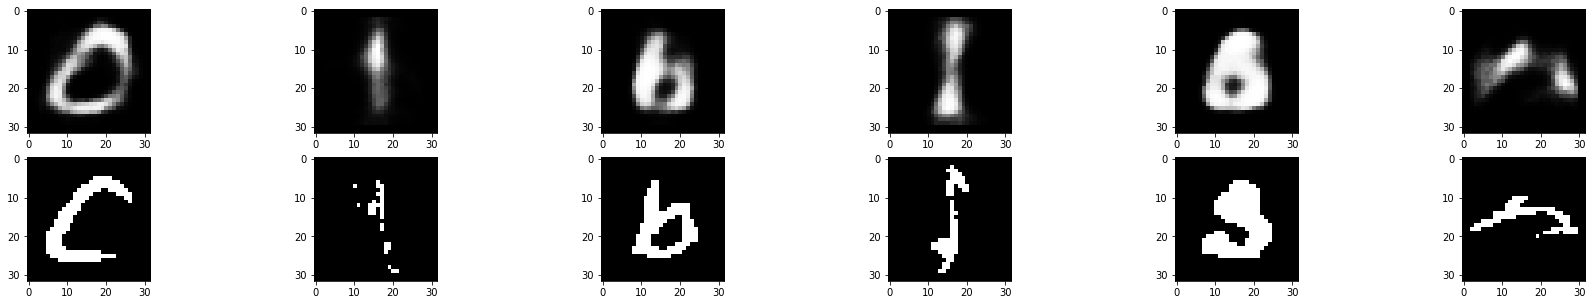

In [55]:
to_predict = better_x_test[:6]
prediction = sae.predict(to_predict)

def visualize_predictions(predictions, data):
    fig, axes = plt.subplots(2, predictions.shape[0], figsize = (predictions.shape[0]*5, 5))
    for i, ax in zip(range(predictions.shape[0]), axes[0, :]):
        ax.imshow(predictions[i], cmap = 'Greys')
    for i, ax in zip(range(predictions.shape[0]), axes[1, :]):
        ax.imshow(better_x_test[i], cmap = 'Greys')  
    return plt

visualize_predictions(prediction, to_predict)

In [56]:
def plot(x):
    df = pd.DataFrame(x, columns = ['x','y','z'])
    fig = px.scatter_3d(df, x='x', y='y', z='z', width=800, height=800)
    fig.show()


prediction = sae.predict(better_x_test)
prediction = prediction.reshape(len(prediction), -1)
x_umap = UMAP(n_neighbors=10, min_dist=0.1, n_components=3, metric='correlation').fit_transform(prediction)
plot(x_umap)

21/21 [==============================] - 0s 2ms/step
